In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
train = pd.read_csv('train.dat')
test = pd.read_csv('test.dat')
train

,# x1,x2,x3,y
0,2.7,0.7,-0.4,5.5
1,3.6,0.3,0.4,7.0
2,3.0,0.7,-0.2,6.0
3,2.7,1.0,-0.6,5.6
4,2.1,0.2,-1.0,4.2
...,...,...,...,...
95,0.9,0.5,-0.6,2.1
96,2.9,0.2,-0.8,5.4
97,0.1,0.3,0.7,0.2
98,4.1,0.1,0.9,8.0


In [4]:
test

,# x1,x2,x3,y
0,4.5,0.4,-0.4,9.5
1,3.9,0.9,-0.3,7.8
2,1.7,0.1,0.0,3.4
3,0.4,0.9,0.5,0.5
4,2.0,0.9,-0.3,4.0
...,...,...,...,...
95,4.8,0.3,1.0,9.7
96,1.8,0.5,-0.3,3.6
97,1.8,0.4,-0.1,3.3
98,0.1,0.2,-0.2,0.1


In [5]:
train.columns = train.columns.str.strip(); X_train = train.drop('y', axis=1).copy(); y_train = train['y']
test.columns =test.columns.str.strip(); X_test = test.drop('y', axis=1).copy(); y_test = test['y']

In [6]:
# %% Create a model function
def linear_0v(beta):
    yp = beta[0]
    return yp

def rss_lin0v(beta, y):
    yp = linear_0v(beta)
    loss = np.sum((y - yp)**2)
    return loss

def linear_1v(beta, x):
    yp = (beta[1] * x) + beta[0]
    return yp

def rss_lin1v(beta, x, y):
    yp = linear_1v(beta, x)
    loss = np.sum((y - yp)**2)
    return loss

def linear_2v(beta, x1, x2):
    yp = (beta[2] * x2) + (beta[1] * x1) + beta[0]
    return yp

def rss_lin2v(beta, x1, x2, y):
    yp = linear_2v(beta, x1, x2)
    loss = np.sum((y - yp)**2)
    return loss

def linear_3v(beta, x1, x2, x3):
    yp = (beta[3] *x3) + (beta[2] * x2) + (beta[1] * x1) + beta[0]
    return yp

def rss_lin3v(beta, x1, x2, x3, y):
    yp = linear_3v(beta, x1, x2, x3)
    loss = np.sum((y - yp)**2)
    return loss

In [7]:
def fit_0v(y):
    beta_i = [0.0]
    res = minimize(rss_lin0v, beta_i, args=(y))
    y_pred = linear_0v(res.x)
    loss = rss_lin0v(res.x, y)
    return res.x, y_pred, loss

def fit_1v(x, y):
    beta_i = [0.0, 0.0]
    res = minimize(rss_lin1v, beta_i, args=(x, y))
    y_pred = linear_1v(res.x, x)
    loss = rss_lin1v(res.x, x, y)
    return res.x, y_pred, loss

def fit_2v(x1, x2, y):
    beta_i = [0.0, 0.0, 0.0]
    res = minimize(rss_lin2v, beta_i, args=(x1, x2, y))
    y_pred = linear_2v(res.x, x1, x2)
    loss = rss_lin2v(res.x, x1, x2, y)
    return res.x, y_pred, loss

def fit_3v(x1, x2, x3, y):
    beta_i = [0.0, 0.0, 0.0, 0.0]
    res = minimize(rss_lin3v, beta_i, args=(x1, x2, x3, y))
    y_pred = linear_3v(res.x, x1, x2, x3)
    loss = rss_lin3v(res.x, x1, x2, x3, y)
    return res.x, y_pred, loss

In [35]:
def Cp(loss, n, d, sigmaSquared, C):
    cp = (1/n) * (loss + (C * d * sigmaSquared))
    return cp

def AIC(loss, n, d, sigmaSquared):
    aic = (1/sigmaSquared) * Cp(loss, n, d, sigmaSquared, 2)
    return aic

def BIC(loss, n, d, sigmaSquared):
    bic = (1/sigmaSquared) * Cp(loss, n, d, sigmaSquared, np.log(n))
    return bic

In [36]:
beta_3v, yp_3v, loss_3v = fit_3v(x1 = X_train['#  x1'], x2=X_train['x2'], x3=X_train['x3'], y = y_train)
sigmaSq = loss_3v/len(y_train)
aic_3v = AIC(loss_3v, len(y_train), len(beta_3v), sigmaSq)
bic_3v = BIC(loss_3v, len(y_train), len(beta_3v), sigmaSq)

In [37]:
beta_2v = {}
yp_2v = {}
loss_2v = {}
aic_2v = {}
bic_2v = {}

for idx, i in enumerate(X_train.iloc[:,0:2]):
    for jdx, j in enumerate(X_train.iloc[:, 1:3]):
        if i != j:
            beta_2v[f'{i}{j}'], yp_2v[f'{i}{j}'], loss_2v[f'{i}{j}'] = fit_2v(x1 = X_train[i], x2=X_train[j], y = y_train)
            aic_2v[f'{i}{j}'] = AIC(loss_2v[f'{i}{j}'], len(y_train), len(beta_2v[f'{i}{j}']), sigmaSq)
            bic_2v[f'{i}{j}'] = BIC(loss_2v[f'{i}{j}'], len(y_train), len(beta_2v[f'{i}{j}']), sigmaSq)
beta_2v

{'#  x1x2': array([0.09377639, 1.96793926, 0.02653346]),
 '#  x1x3': array([ 0.11081812,  1.96697513, -0.04107119]),
 'x2x3': array([ 5.17648674, -0.7854977 , -0.23839056])}

In [86]:
beta_1v = {}
y_1v = {}
loss_1v = {}
aic_1v = {}
bic_1v = {}

for idx, i in enumerate(X_train.columns):
    beta_1v[i], y_1v[i], loss_1v[i] = fit_1v(X_train[i], y_train)
    aic_1v[i] = AIC(loss_1v[i], len(y_train), len(beta_1v[i]), sigmaSq)
    bic_1v[i] = BIC(loss_1v[i], len(y_train), len(beta_1v[i]), sigmaSq)
beta_1v

{'#  x1': array([0.10866476, 1.96755617]),
 'x2': array([ 5.14204349, -0.72873528]),
 'x3': array([ 4.76177273, -0.19856794])}

In [88]:
aic_1v

{'#  x1': 1.0532366635794532,
 'x2': 166.57410793541456,
 'x3': 167.13331872960697}

In [75]:
beta_0v, yp_0v, loss_0v = fit_0v(y_train)
aic_0v = AIC(beta_0v, len(y_train), len(beta_0v), sigmaSq)
bic_0v = BIC(beta_0v, len(y_train), len(beta_0v), sigmaSq)


# Part 1

In [92]:
print("Model      Beta0   Beta1   Beta2   Beta3     Loss      AIC      BIC")
fmtstr = "{0:8s}  {1:6.3f}  {2:6.3f}  {3:6.3f}  {4:6.3f}  {5:6.3f}  {6:7.3f}  {7:7.3f}"
print(fmtstr.format("Const", beta_0v[0], 0.0, 0.0, 0.0, loss_0v, aic_0v[0], bic_0v[0]))

for i in beta_1v.keys():
    print(fmtstr.format(f"{i.lstrip('# ')}:", beta_1v[i][0], beta_1v[i][1], 0.0, 0.0, loss_1v[i], aic_1v[i], bic_1v[i]))

for i in beta_2v.keys():
    print(fmtstr.format(f"{i.lstrip('# ')}:", beta_2v[i][0], beta_2v[i][1], beta_2v[i][2], 0.0, loss_2v[i], aic_2v[i], bic_2v[i]))

print(fmtstr.format(f"x1,x2,x3:", beta_3v[0], beta_3v[1], beta_3v[2], beta_3v[3], loss_3v, aic_3v, bic_3v))

Model      Beta0   Beta1   Beta2   Beta3     Loss      AIC      BIC
Const      4.758   0.000   0.000   0.000  809.324    1.004    1.030
x1:        0.109   1.968   0.000   0.000   4.899    1.053    1.105
x2:        5.142  -0.729   0.000   0.000  805.172  166.574  166.626
x3:        4.762  -0.199   0.000   0.000  807.876  167.133  167.185
x1x2:      0.094   1.968   0.027   0.000   4.893    1.072    1.150
x1x3:      0.111   1.967  -0.041   0.000   4.837    1.060    1.139
x2x3:      5.176  -0.785  -0.238   0.000  803.111  166.168  166.246
x1,x2,x3:   0.101   1.967   0.017  -0.040   4.835    1.080    1.184


## From the list of models, AICs and BICs, the x1 is the strongest input that effect the output

In [107]:
def ridge_fn(beta, lamda, x1, x2, x3, y):
    y_pred = beta[0] + beta[1]*x1 + beta[2]*x2 + beta[3]*x3
    rss = np.sum((y - y_pred)**2)
    norm = beta[1]**2 + beta[2]**2 + beta[3]**2
    return rss + lamda*norm

def fit_ridge(lamda, x1, x2, x3, y):
    beta_i = [1.0, 1.0, 1.0, 1.0]
    out = minimize(ridge_fn, beta_i, args=(lamda, x1, x2, x3, y))
    beta_fit = out.x
    return beta_fit

# Part 2

In [110]:
#Specify lambda_i and lambda_f as power of ten
def fit_ridge_out(lamda_i, lamda_f, x1, x2, x3, y):
    #Assign range of varying lambda
    lamd_i = 10**lamda_i
    lamd_f = 10**lamda_f
    lamd_vary = np.logspace(np.log10(lamd_i), np.log10(lamd_f), num=100)    
    #Call function to fit data
    betafit = fit_ridge(0.0, x1, x2, x3, y)
    normfit = betafit[1]**2 + betafit[2]**2 + betafit[3]**2
    #Build empty array for store fitted parameters
    beta0_fit = np.zeros(len(lamd_vary))
    beta1_fit = np.zeros(len(lamd_vary))
    beta2_fit = np.zeros(len(lamd_vary))
    beta3_fit = np.zeros(len(lamd_vary))
    norm_fit = np.zeros(len(lamd_vary)) 
    #Find the best-fit parameters and norms by fit ridge to each value of lambda
    for i in range(len(lamd_vary)):
        lamda = lamd_vary[i]
        beta_out = fit_ridge(lamda, x1, x2, x3, y)
        norm_fit[i] = beta_out[1]**2 + beta_out[2]**2 + beta_out[3]**2
        beta0_fit[i] = beta_out[0]
        beta1_fit[i] = beta_out[1]
        beta2_fit[i] = beta_out[2]
        beta3_fit[i] = beta_out[3]
        
    norm_ratio = norm_fit / normfit
    # print(lamd_vary, beta1_fit, beta2_fit, beta3_fit, beta4_fit, sep='\n')
    return lamd_vary, beta0_fit, beta1_fit, beta2_fit, beta3_fit, norm_ratio

In [111]:
lamda_x, betafit0, betafit1, betafit2, betafit3, norm_ratio_rid = fit_ridge_out(4, -3, X_train['#  x1'], X_train['x2'], X_train['x3'], y_train)

In [112]:
print("Lamda", lamda_x, "beta", betafit0, betafit1, betafit2, betafit3, "norm ratio", norm_ratio_rid, sep='\n')

Lamda
[1.00000000e+04 8.49753436e+03 7.22080902e+03 6.13590727e+03
 5.21400829e+03 4.43062146e+03 3.76493581e+03 3.19926714e+03
 2.71858824e+03 2.31012970e+03 1.96304065e+03 1.66810054e+03
 1.41747416e+03 1.20450354e+03 1.02353102e+03 8.69749003e+02
 7.39072203e+02 6.28029144e+02 5.33669923e+02 4.53487851e+02
 3.85352859e+02 3.27454916e+02 2.78255940e+02 2.36448941e+02
 2.00923300e+02 1.70735265e+02 1.45082878e+02 1.23284674e+02
 1.04761575e+02 8.90215085e+01 7.56463328e+01 6.42807312e+01
 5.46227722e+01 4.64158883e+01 3.94420606e+01 3.35160265e+01
 2.84803587e+01 2.42012826e+01 2.05651231e+01 1.74752840e+01
 1.48496826e+01 1.26185688e+01 1.07226722e+01 9.11162756e+00
 7.74263683e+00 6.57933225e+00 5.59081018e+00 4.75081016e+00
 4.03701726e+00 3.43046929e+00 2.91505306e+00 2.47707636e+00
 2.10490414e+00 1.78864953e+00 1.51991108e+00 1.29154967e+00
 1.09749877e+00 9.32603347e-01 7.92482898e-01 6.73415066e-01
 5.72236766e-01 4.86260158e-01 4.13201240e-01 3.51119173e-01
 2.98364724e-01 2.

## Ridge
$\lambda$ against $\beta$

Text(0.5, 1.0, 'Ridge Regression Data 1: Ratio of norm VS Best-fit parameter')

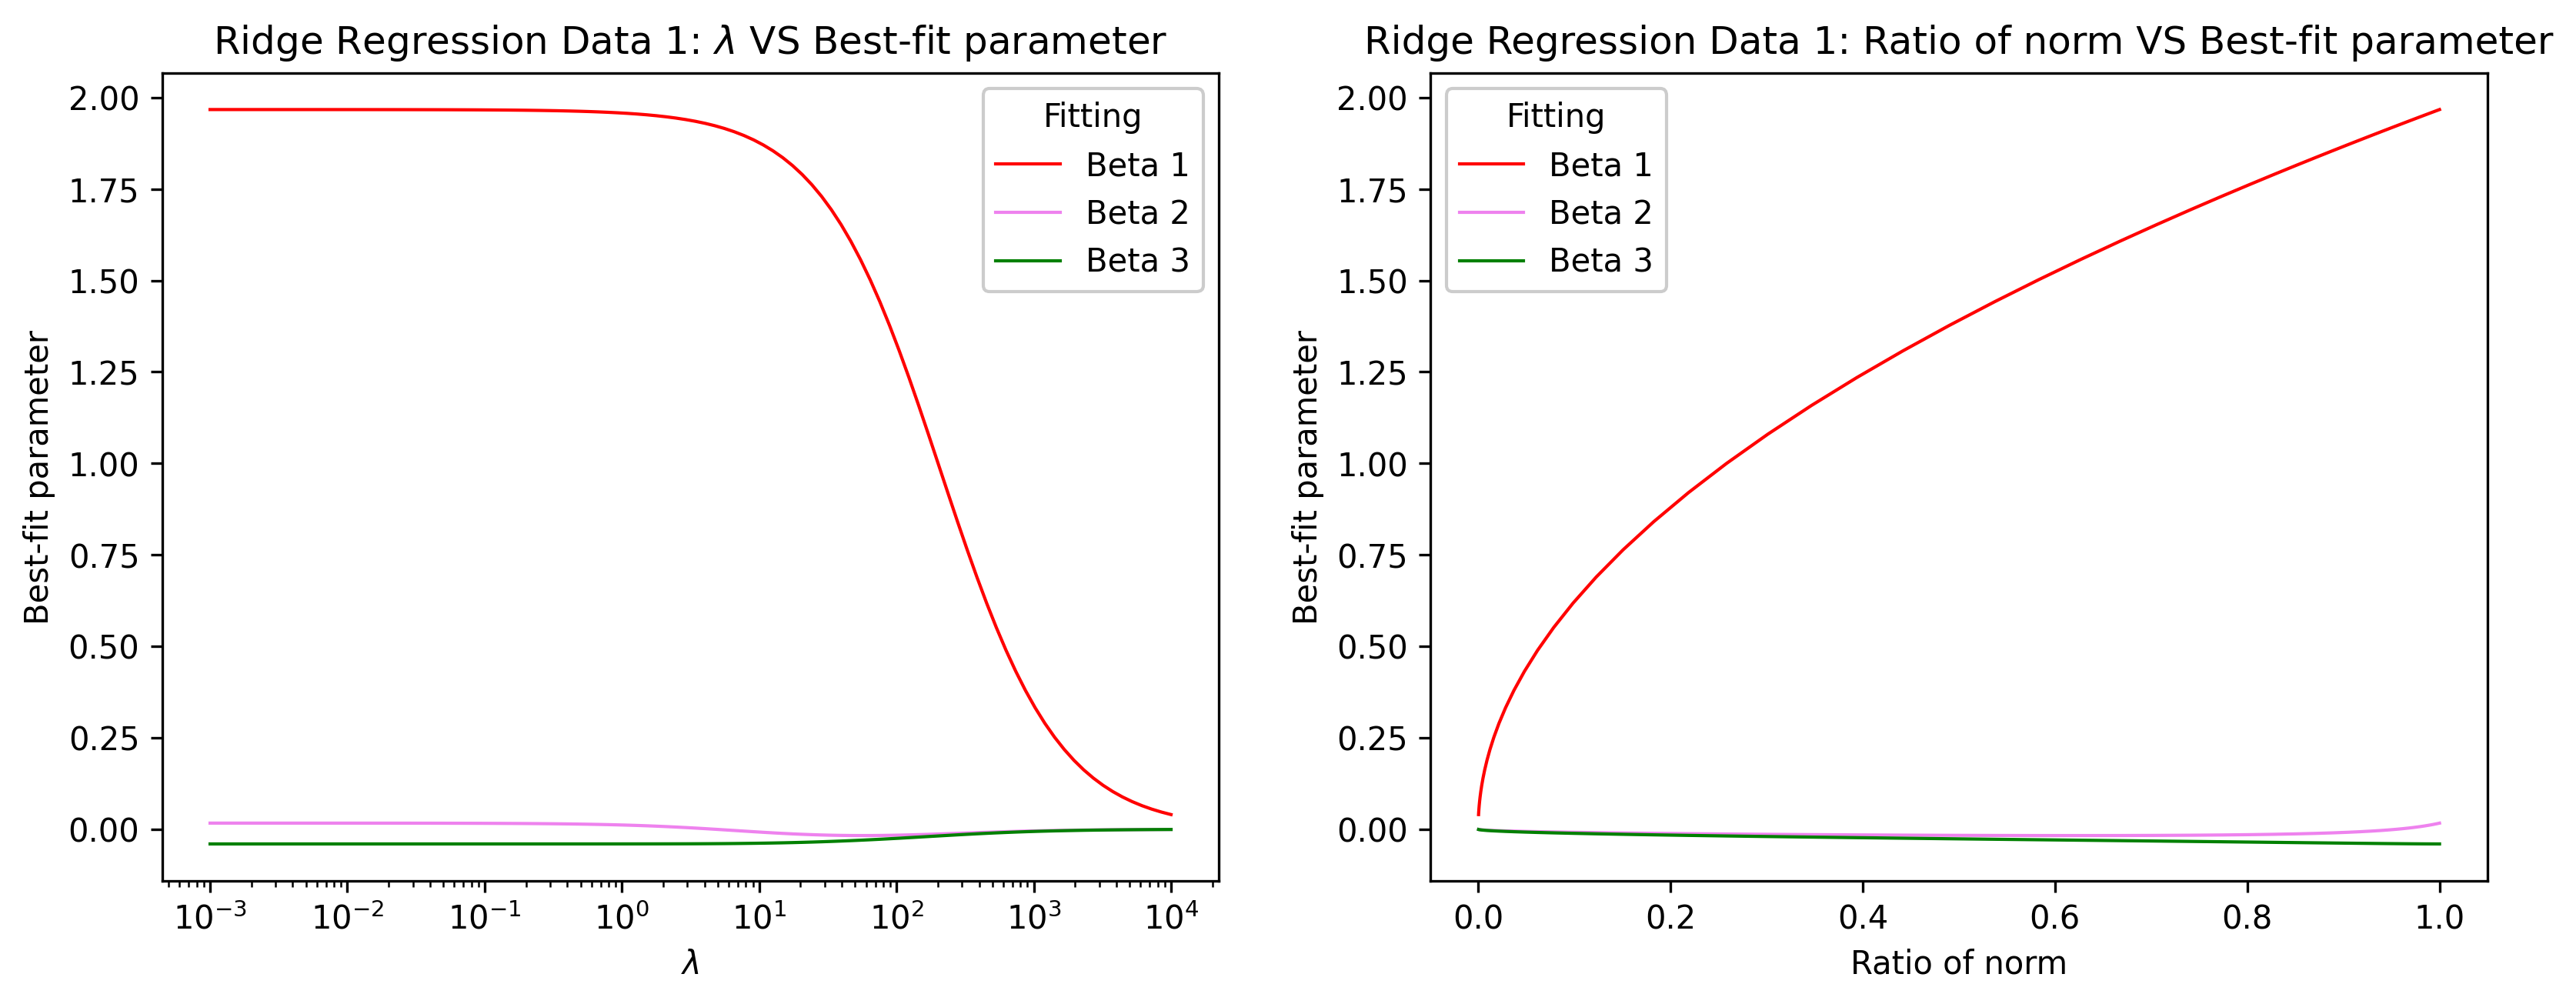

In [113]:
figure = plt.figure(0, figsize=(13,10), dpi=300)
plt.subplot(221)
# plt.plot(lamda_x, betafit0, color="turquoise", linewidth=1, label = "Beta 0")
plt.plot(lamda_x, betafit1, color="red", linewidth=1, label = "Beta 1")
plt.plot(lamda_x, betafit2, color="violet", linewidth=1, label = "Beta 2")
plt.plot(lamda_x, betafit3, color="green", linewidth=1, label = "Beta 3")
# plt.plot(lamda_x, betafit4, color="chocolate", linewidth=1, label = "Beta 4")
plt.xlabel("$\lambda$")
plt.ylabel("Best-fit parameter")
plt.xscale("log")
plt.legend(title = "Fitting",facecolor = 'white',framealpha=1)
plt.title('Ridge Regression Data 1: $\lambda$ VS Best-fit parameter')

plt.subplot(222)
# plt.plot(norm_ratio_rid, betafit0, color="turquoise", linewidth=1, label = "Beta 0")
plt.plot(norm_ratio_rid, betafit1, color="red", linewidth=1, label = "Beta 1")
plt.plot(norm_ratio_rid, betafit2, color="violet", linewidth=1, label = "Beta 2")
plt.plot(norm_ratio_rid, betafit3, color="green", linewidth=1, label = "Beta 3")
# plt.plot(norm_ratio_rid, betafit4, color="chocolate", linewidth=1, label = "Beta 4")
plt.xlabel("Ratio of norm")
plt.ylabel("Best-fit parameter")
# plt.xscale("log")
plt.legend(title = "Fitting",facecolor = 'white',framealpha=1)
plt.title('Ridge Regression Data 1: Ratio of norm VS Best-fit parameter')

In [114]:
def lasso_fn(beta, lamda, x1, x2, x3, y):
    y_pred = beta[0] + beta[1]*x1 + beta[2]*x2 + beta[3]*x3
    rss = np.sum((y - y_pred)**2)
    norm = np.abs(beta[1]) + np.abs(beta[2]) + np.abs(beta[3])
    return rss + lamda*norm

def fit_lasso(lamda, x1, x2, x3, y):
    beta_i = [1.0, 1.0, 1.0, 1.0]
    out = minimize(lasso_fn, beta_i, args=(lamda, x1, x2, x3, y))
    beta_fit = out.x
    return beta_fit

In [115]:
#Specify lambda_i and lambda_f as power of ten
def fit_lasso_out(lamda_i, lamda_f, x1, x2, x3, y):
    #Assign range of varying lambda
    lamd_i = 10**lamda_i
    lamd_f = 10**lamda_f
    lamd_vary = np.logspace(np.log10(lamd_i), np.log10(lamd_f), num=100)    
    #Call function to fit data
    betafit = fit_lasso(0.0, x1, x2, x3, y)
    normfit = np.abs(betafit[1]) + np.abs(betafit[2]) + np.abs(betafit[3])
    #Build empty array for store fitted parameters
    beta0_fit = np.zeros(len(lamd_vary))
    beta1_fit = np.zeros(len(lamd_vary))
    beta2_fit = np.zeros(len(lamd_vary))
    beta3_fit = np.zeros(len(lamd_vary))
    norm_fit = np.zeros(len(lamd_vary)) 
    #Find the best-fit parameters and norms by fit ridge to each value of lambda
    for i in range(len(lamd_vary)):
        lamda = lamd_vary[i]
        beta_out = fit_lasso(lamda, x1, x2, x3, y)
        norm_fit[i] = np.abs(beta_out[1]) + np.abs(beta_out[2]) + np.abs(beta_out[3])
        beta0_fit[i] = beta_out[0]
        beta1_fit[i] = beta_out[1]
        beta2_fit[i] = beta_out[2]
        beta3_fit[i] = beta_out[3]

    norm_ratio = norm_fit / normfit
    # print(lamd_vary, beta1_fit, beta2_fit, beta3_fit, beta4_fit, sep='\n')
    return lamd_vary, beta0_fit, beta1_fit, beta2_fit, beta3_fit, norm_ratio

In [120]:
lamda_x2, betafit0_2, betafit1_2, betafit2_2, betafit3_2, norm_ratio_rid_2 = fit_lasso_out(4, -3, X_train['#  x1'], X_train['x2'], X_train['x3'], y_train)

In [117]:
print("lambda", lamda_x2, "beta", betafit0_2, betafit1_2, betafit2_2, betafit3_2, "norm ratio", norm_ratio_rid_2, sep='\n')

lambda
[1.00000000e+04 8.49753436e+03 7.22080902e+03 6.13590727e+03
 5.21400829e+03 4.43062146e+03 3.76493581e+03 3.19926714e+03
 2.71858824e+03 2.31012970e+03 1.96304065e+03 1.66810054e+03
 1.41747416e+03 1.20450354e+03 1.02353102e+03 8.69749003e+02
 7.39072203e+02 6.28029144e+02 5.33669923e+02 4.53487851e+02
 3.85352859e+02 3.27454916e+02 2.78255940e+02 2.36448941e+02
 2.00923300e+02 1.70735265e+02 1.45082878e+02 1.23284674e+02
 1.04761575e+02 8.90215085e+01 7.56463328e+01 6.42807312e+01
 5.46227722e+01 4.64158883e+01 3.94420606e+01 3.35160265e+01
 2.84803587e+01 2.42012826e+01 2.05651231e+01 1.74752840e+01
 1.48496826e+01 1.26185688e+01 1.07226722e+01 9.11162756e+00
 7.74263683e+00 6.57933225e+00 5.59081018e+00 4.75081016e+00
 4.03701726e+00 3.43046929e+00 2.91505306e+00 2.47707636e+00
 2.10490414e+00 1.78864953e+00 1.51991108e+00 1.29154967e+00
 1.09749877e+00 9.32603347e-01 7.92482898e-01 6.73415066e-01
 5.72236766e-01 4.86260158e-01 4.13201240e-01 3.51119173e-01
 2.98364724e-01 2

## Lasso
$\lambda$ against $\beta$

Text(0.5, 1.0, 'Lasso Data 1: Ratio of norm VS Best-fit parameter')

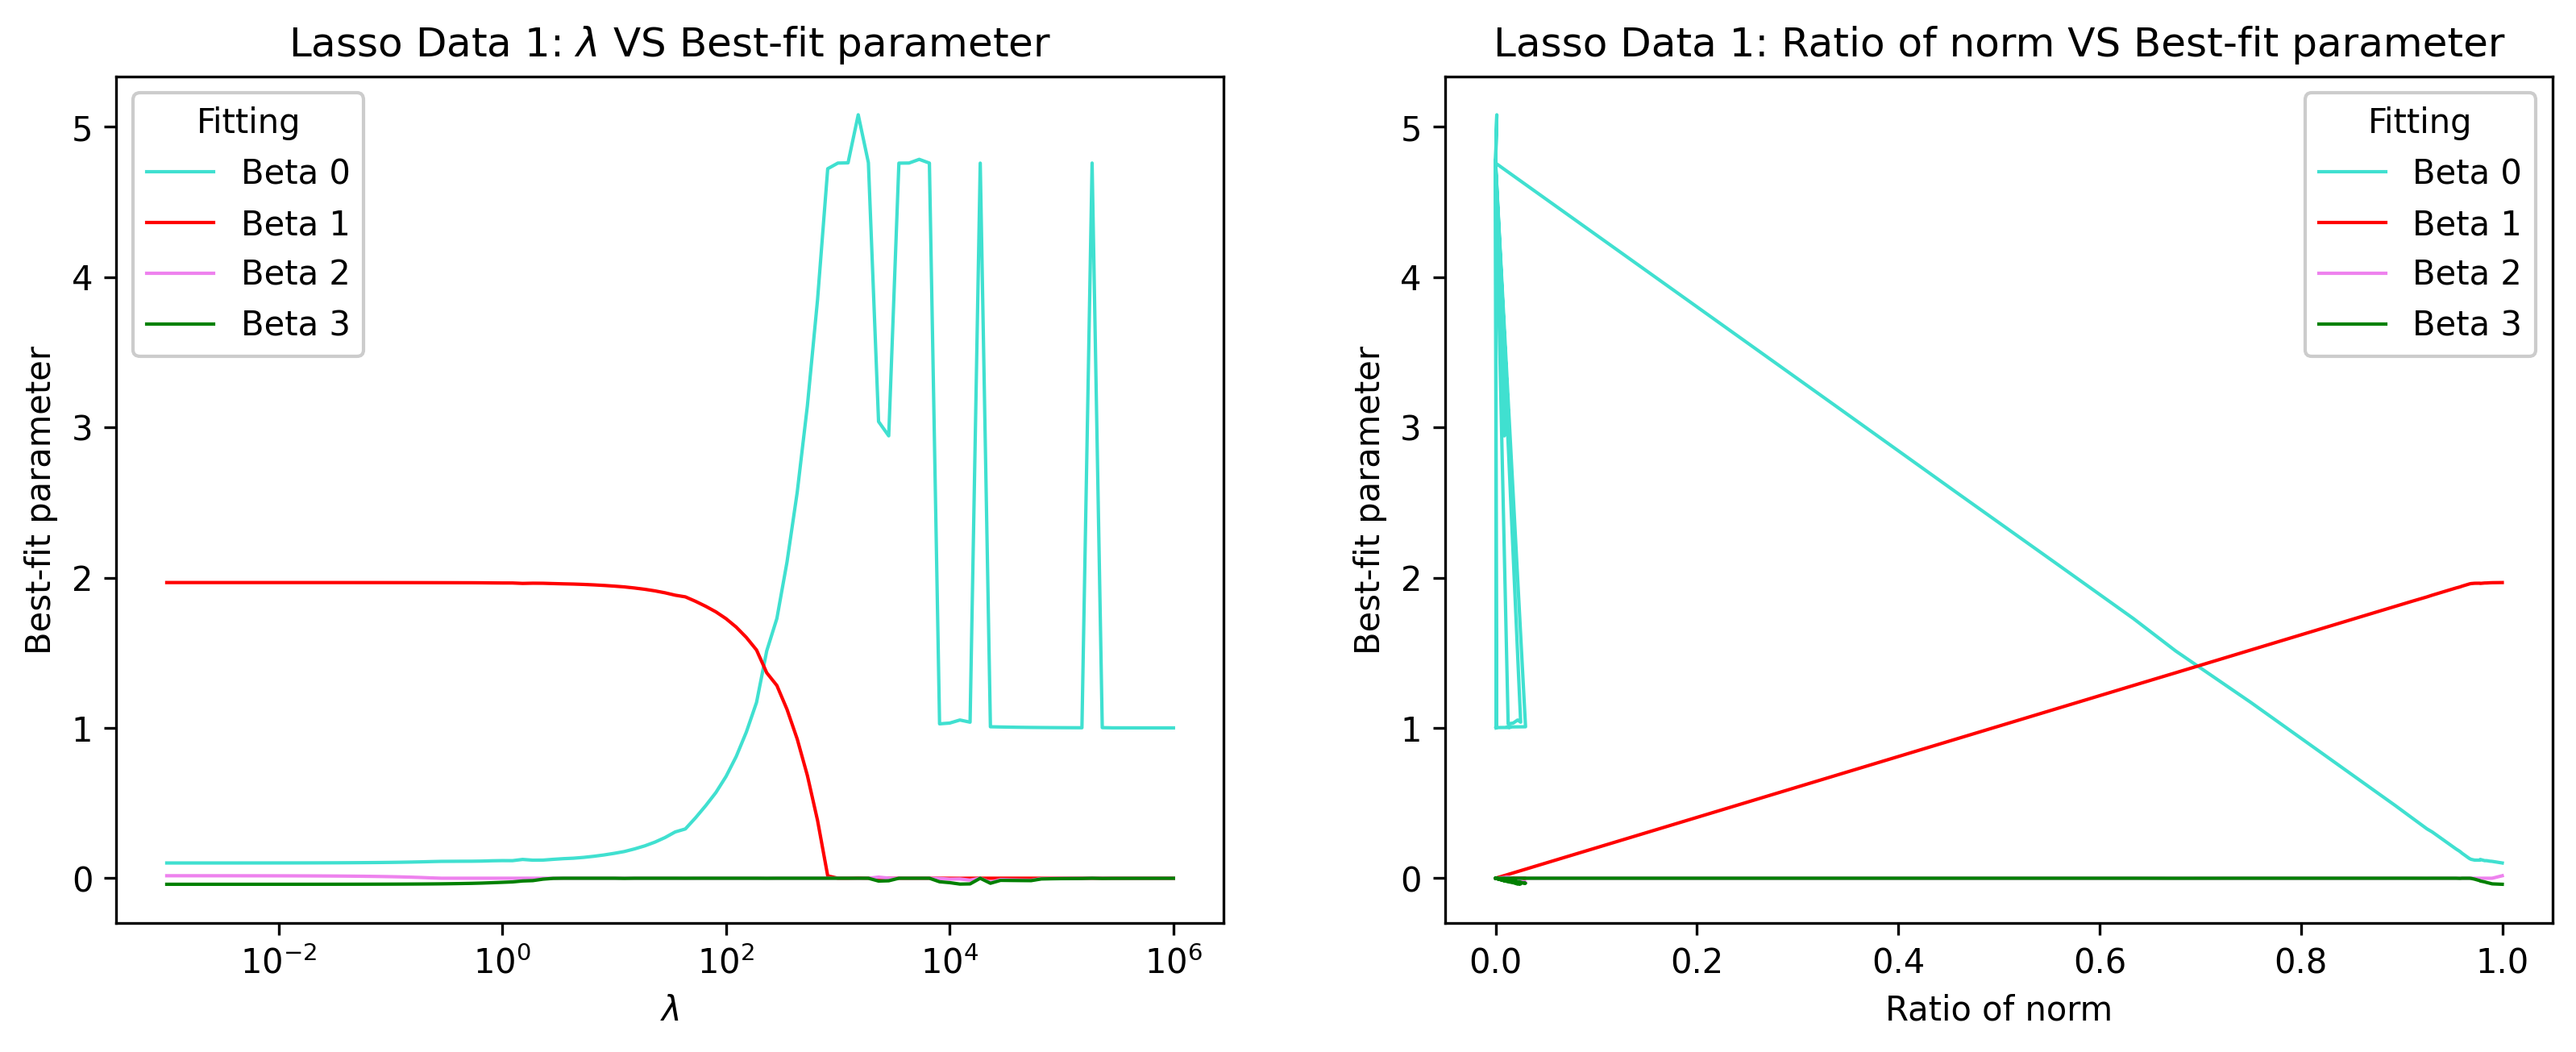

In [121]:
figure = plt.figure(1, figsize=(13,10), dpi=300)
plt.subplot(221)
plt.plot(lamda_x2, betafit0_2, color="turquoise", linewidth=1, label = "Beta 0")
plt.plot(lamda_x2, betafit1_2, color="red", linewidth=1, label = "Beta 1")
plt.plot(lamda_x2, betafit2_2, color="violet", linewidth=1, label = "Beta 2")
plt.plot(lamda_x2, betafit3_2, color="green", linewidth=1, label = "Beta 3")
# plt.plot(lamda_x2, betafit4_2, color="chocolate", linewidth=1, label = "Beta 4")
plt.xlabel("$\lambda$")
plt.ylabel("Best-fit parameter")
plt.xscale("log")
plt.legend(title = "Fitting",facecolor = 'white',framealpha=1)
plt.title('Lasso Data 1: $\lambda$ VS Best-fit parameter')

plt.subplot(222)
plt.plot(norm_ratio_rid_2, betafit0_2, color="turquoise", linewidth=1, label = "Beta 0")
plt.plot(norm_ratio_rid_2, betafit1_2, color="red", linewidth=1, label = "Beta 1")
plt.plot(norm_ratio_rid_2, betafit2_2, color="violet", linewidth=1, label = "Beta 2")
plt.plot(norm_ratio_rid_2, betafit3_2, color="green", linewidth=1, label = "Beta 3")
# plt.plot(norm_ratio_rid_2, betafit4_2, color="chocolate", linewidth=1, label = "Beta 4")
plt.xlabel("Ratio of norm")
plt.ylabel("Best-fit parameter")
# plt.xscale("log")
plt.legend(title = "Fitting",facecolor = 'white',framealpha=1)
plt.title('Lasso Data 1: Ratio of norm VS Best-fit parameter')
# plt.savefig("/content/drive/MyDrive/4th Year/DataScience/lasso_lamb1.png", dpi = 600,bbox_inches='tight')

In [134]:
y_predL = []
y_predR = []
mse_allL = []
mse_allR = []
y_predL_train = []
y_predR_train = []
mse_allL_train = []
mse_allR_train = []
for i in range(len(betafit0)):
    # print('i', i)
    y_predRi = betafit0[i] + betafit1[i]*X_test.iloc[:,0] + betafit2[i]*X_test.iloc[:,1] + betafit3[i]*X_test.iloc[:,2]
    y_predLi = betafit0_2[i] + betafit1_2[i]*X_test.iloc[:,0] + betafit2_2[i]*X_test.iloc[:,1] + betafit3_2[i]*X_test.iloc[:,2]
    y_predRi_train = betafit0[i] + betafit1[i]*X_train.iloc[:,0] + betafit2[i]*X_train.iloc[:,1] + betafit3[i]*X_train.iloc[:,2]
    y_predLi_train = betafit0_2[i] + betafit1_2[i]*X_train.iloc[:,0] + betafit2_2[i]*X_train.iloc[:,1] + betafit3_2[i]*X_train.iloc[:,2]
    # print("y pred R", y_predRi, "y pred L", y_predLi, sep='-')
    y_predR.append(y_predRi)
    y_predL.append(y_predLi)
    mse_R = np.mean((y_test - y_predRi)**2)
    mse_L = np.mean((y_test - y_predLi)**2)
    mse_allR.append(mse_R)
    mse_allL.append(mse_L)
    
    y_predR_train.append(y_predRi_train)
    y_predL_train.append(y_predLi_train)
    mse_R_train = np.mean((y_train - y_predRi_train)**2)
    mse_L_train = np.mean((y_train - y_predLi_train)**2)
    mse_allR_train.append(mse_R_train)
    mse_allL_train.append(mse_L_train)
    # y_pred_all.append(y_pred)


## Mean-squared error

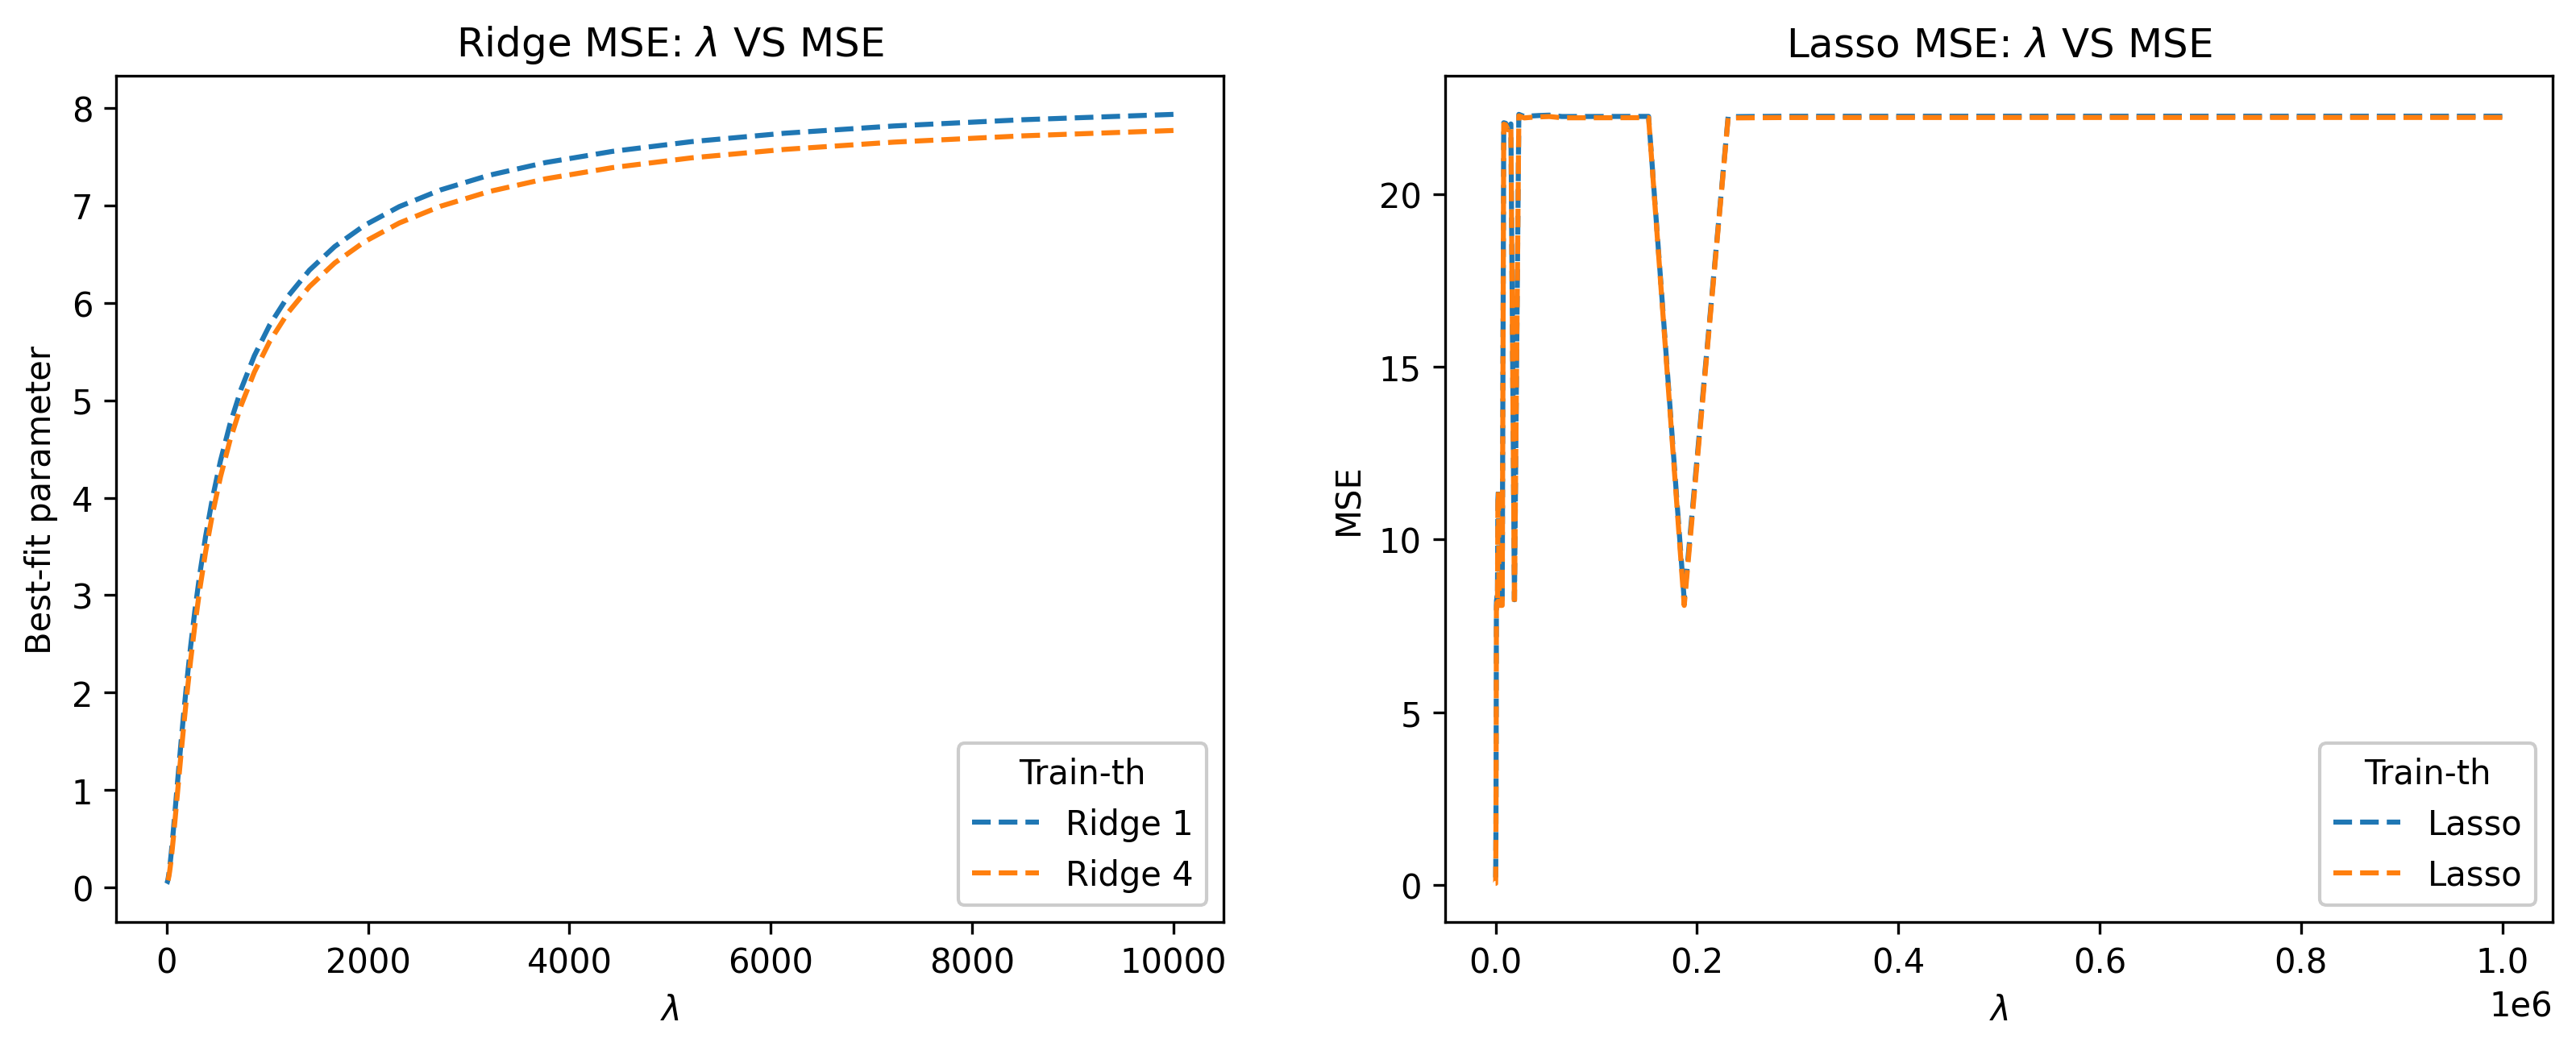

In [135]:
fig_mse = plt.figure(3, figsize=(13,10), dpi=300)
ax_mseRidge = fig_mse.add_subplot(221)
ax_mseRidge.plot(lamda_x, mse_allR, '--', label='Ridge 1')
ax_mseRidge.plot(lamda_x, mse_allR_train, '--', label='Ridge 4')
ax_mseRidge.set_xlabel("$\lambda$")
ax_mseRidge.set_ylabel("Best-fit parameter")
ax_mseRidge.set_title('Ridge MSE: $\lambda$ VS MSE')
plt.legend(title = "Train-th",facecolor = 'white',framealpha=1)

ax_mseLasso =  fig_mse.add_subplot(222)
ax_mseLasso.plot(lamda_x2, mse_allL, '--', label='Lasso')
ax_mseLasso.plot(lamda_x2, mse_allL_train, '--', label='Lasso')
ax_mseLasso.set_xlabel("$\lambda$")
ax_mseLasso.set_ylabel("MSE")
ax_mseLasso.set_title('Lasso MSE: $\lambda$ VS MSE')
plt.legend(title = "Train-th",facecolor = 'white',framealpha=1)